In [9]:
# day20
import tensorflow as tf
tf.range(5) # 0-4 까지 range 생성


<tf.Tensor 'range:0' shape=(5,) dtype=int32>

In [3]:
tf.linspace(0.0,5,11) # 선형공간 생성 # floating pointing number 
# 0 - 5 공간을 11구간으로 해체 

<tf.Tensor 'LinSpace_1:0' shape=(11,) dtype=float32>

In [5]:
tf.zeros((2,3)) # 상수텐서 # 32비트 상수 자료형 (default)


<tf.Tensor 'zeros_1:0' shape=(2, 3) dtype=float32>

In [16]:
tf.ones((2,3))

<tf.Tensor 'ones_1:0' shape=(2, 3) dtype=float32>

In [17]:
tf.fill([3,3],5) # 3행 3열 전부 5로채워


<tf.Tensor 'Fill_8:0' shape=(3, 3) dtype=int32>

In [18]:
tf.zeros_like([[3,4,5],[0,0,1]]) # 2행 3열에 모두 0이 채워진채로 배열생성

<tf.Tensor 'zeros_like:0' shape=(2, 3) dtype=int32>

In [23]:
# random 모듈
tf.set_random_seed(777)
tf.random.set_random_seed(777)
# 동일 난수 생성 // weight, bias 동일값 생성위해 // 모델객관적 평가 가능 
tf.random.shuffle([1,2,3,4])
# tensorflow.org - API

<tf.Tensor 'RandomShuffle_1:0' shape=(4,) dtype=int32>

In [32]:
# 차원관련 함수 리스트 
x=(3,2) # x가 1차원 벡터 => 3행2열 .. 전치행렬
tf.transpose(x)

<tf.Tensor 'transpose:0' shape=(2,) dtype=int32>

In [37]:
r0=tf.reshape(tf.range(12), (3,4))
sess=tf.Session()
sess.run(r0)
r1=tf.slice(r0,[0,1],[2,3])
# print(sess.run(r1))
s1,s2=tf.split(r0,num_or_size_splits=2, axis=1) # 몇개로 분할할래 
# print(s1,
#       s2)
print(sess.run(r0))
print(sess.run(s1))
print(sess.run(s2))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]
[[ 2  3]
 [ 6  7]
 [10 11]]


In [42]:
a=tf.range(6, dtype=tf.int32)
b=2*tf.ones(6, dtype=tf.int32)
# sess.run(a) # 내용보려면 sess 함수 이용해서 run 시켜야함
# sess.run(b)

# 사칙연산
print(sess.run(tf.add(a,b)))
print(sess.run(tf.subtract(a,b)))
print(sess.run(tf.multiply(a,b)))
print(sess.run(tf.divide(a,b)))


[2 3 4 5 6 7]
[-2 -1  0  1  2  3]
[ 0  2  4  6  8 10]
[0.  0.5 1.  1.5 2.  2.5]


In [89]:
# Computation

# # 괄호안 숫자에 대해 절대값 구하는 함수 
# tf.abs
# # 제곱연산
# tf.square
# # 누적합
# tf.cumsum()
# # 제곱근
# tf.sqrt
# # 최대. 최소값 도출 
# tf.maximum, minimum()

# # axis 설정된 축 기준으로 평균 
# tf.reduce_mean() 
# tf.reduce_sum() 
# tf.reduce_min() 
# tf.reduce_max() 


In [92]:
x=tf.constant([[2,0],[0,1]], dtype=tf.float32)
y=tf.constant([[1,1],[1,1]], dtype=tf.float32)
z=tf.matmul(x,y) # 행렬간 곱셉 수행 함수 
# sess.run(z)
# 역행렬 (algbra)
xinv=tf.linalg.inv(x)
print(sess.run(xinv))

[[0.5 0. ]
 [0.  1. ]]


In [111]:
# tf.nn.sigmoid() # 로지스틱함수

# 회귀모델 (예측)
# 단순회귀모델 (hf=wx+b)
# hf = 우리의 예측값
# hf <-> ytrain 오차 존재 
xtrain = [1,2,3] # x ( 실제 입력 데이터값 )
ytrain = [1,2,3] # hf ( 실제 결과값 ) // 출력 결과값
b = tf.Variable(tf.random_normal([1]))  # 가변값 
w = tf.Variable(tf.random_normal([1]))
# 상수 직접입력하여 초기값 설정가능하다 or Random값 줘도 가능 
# random_normal : normal distribution ( 정규화 )
# 모델만든다 => w, b 를 찾겠다 // 초기값주지않는다 ? 

# 우리의 모델 
hf = xtrain*w+b
cost=tf.reduce_mean(tf.square(hf-ytrain)) # 차원이 줄여진다 
# reduce 명명 이유 - ex) 2차원 -> 1 차원 // 1차원-> 0 차원 
# cost=tf.reduce_mean(tf.square(hf - ytrain))

# algorithm : 문제를 해결하기위한 효과적인 방법
# gradient.descent = (경사를 따라서 아래쪽으로 내려가는 optimizer 알고리즘 )
opt=tf.train.GradientDescentOptimizer(0.01) # 어떻게 내려가야 가장 효과적으로 값을 찾아내느냐
train=opt.minimize(cost) # 최소화(minimize) = TrainNode
# cost에 대해서 minimize한다  

# train=tf.train.GradientDescentOptimizer(0.01).minimize()
# cost 를 최소화하는 w, b를 찾겠다 

############# Graph Definition Part ####################

############### Graph Excuting Part ####################
# ART 비교사학습 알고리즘 
sess=tf.Session()
sess.run(tf.global_variables_initializer()) # 임의의 난수 생성 # 변수 초기화 

# 트레이닝 ( 머신러닝 )
# for step in range(2001):
#     print('step : ', step)
#     print('w=', sess.run(w)) # => error
#     print('b=', sess.run(b))
#     print('cost=', sess.run(cost))
#     sess.run(train) # gradient model 생성 핵심문 [갱신 issue 다룬다]

for step in range(2001):
    sess.run(train)
    if step % 20==0:
        print(step, cv, wv, bv)
'''
print('step : 1')
# x=1, y=1
# -0.04*1 + 1.059 = > 1.019
print('w=', sess.run(w)) # => error
print('b=', sess.run(b))
print('cost=', sess.run(cost))
sess.run(train) # gradient model 생성 핵심문 [갱신 issue 다룬다]

# session 객체 통해 변수 초기화 과정 필요! 
# 모델과 실제값 사이의 오차 줄이자!! 

print('step : 2')
print('w=', sess.run(w)) # => error
print('b=', sess.run(b))
print('cost=', sess.run(cost))
sess.run(train)

print('step : 3')
print('w=', sess.run(w)) # => error
print('b=', sess.run(b))
print('cost=', sess.run(cost))
sess.run(train)

print('step : 4')
print('w=', sess.run(w)) # => error
print('b=', sess.run(b))
print('cost=', sess.run(cost))
sess.run(train)

# 해석 아래서 부터 위로 쭉 올라가면서 해석한다  
'''

0 3.6894833e-06 [0.9977745] [0.00505906]
20 3.6894833e-06 [0.9977745] [0.00505906]
40 3.6894833e-06 [0.9977745] [0.00505906]
60 3.6894833e-06 [0.9977745] [0.00505906]
80 3.6894833e-06 [0.9977745] [0.00505906]
100 3.6894833e-06 [0.9977745] [0.00505906]
120 3.6894833e-06 [0.9977745] [0.00505906]
140 3.6894833e-06 [0.9977745] [0.00505906]
160 3.6894833e-06 [0.9977745] [0.00505906]
180 3.6894833e-06 [0.9977745] [0.00505906]
200 3.6894833e-06 [0.9977745] [0.00505906]
220 3.6894833e-06 [0.9977745] [0.00505906]
240 3.6894833e-06 [0.9977745] [0.00505906]
260 3.6894833e-06 [0.9977745] [0.00505906]
280 3.6894833e-06 [0.9977745] [0.00505906]
300 3.6894833e-06 [0.9977745] [0.00505906]
320 3.6894833e-06 [0.9977745] [0.00505906]
340 3.6894833e-06 [0.9977745] [0.00505906]
360 3.6894833e-06 [0.9977745] [0.00505906]
380 3.6894833e-06 [0.9977745] [0.00505906]
400 3.6894833e-06 [0.9977745] [0.00505906]
420 3.6894833e-06 [0.9977745] [0.00505906]
440 3.6894833e-06 [0.9977745] [0.00505906]
460 3.6894833e-06

"\nprint('step : 1')\n# x=1, y=1\n# -0.04*1 + 1.059 = > 1.019\nprint('w=', sess.run(w)) # => error\nprint('b=', sess.run(b))\nprint('cost=', sess.run(cost))\nsess.run(train) # gradient model 생성 핵심문 [갱신 issue 다룬다]\n\n# session 객체 통해 변수 초기화 과정 필요! \n# 모델과 실제값 사이의 오차 줄이자!! \n\nprint('step : 2')\nprint('w=', sess.run(w)) # => error\nprint('b=', sess.run(b))\nprint('cost=', sess.run(cost))\nsess.run(train)\n\nprint('step : 3')\nprint('w=', sess.run(w)) # => error\nprint('b=', sess.run(b))\nprint('cost=', sess.run(cost))\nsess.run(train)\n\nprint('step : 4')\nprint('w=', sess.run(w)) # => error\nprint('b=', sess.run(b))\nprint('cost=', sess.run(cost))\nsess.run(train)\n\n# 해석 아래서 부터 위로 쭉 올라가면서 해석한다  \n"

In [121]:
# placeholder 사용한 학습
xtrain=[1,2,3]
ytrain=[1,2,3]
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

x = tf.placeholder(tf.float32, shape=[None]) 
y = tf.placeholder(tf.float32, shape=[None]) 
hf = x*w+b # matrix multiplier 

cost=tf.reduce_mean(tf.square(hf-y))
# sess.run(cost)
opt=tf.train.GradientDescentOptimizer(0.01) # 어떻게 내려가야 가장 효과적으로 값을 찾아내느냐
train=opt.minimize(cost) # 최소화(minimize) = TrainNode

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cv, wv, bv, _ = sess.run([cost,w,b,train], feed_dict={x:[1,2,3],y:[1,2,3]}) 
    if step%20 == 0 :
        print(step, cv, wv, bv)
    # 변수는 keyvalue 로 구분해! # _ : 무시요소 

0 6.430762 [-0.07369778] [0.06876893]
20 0.08494538 [0.7266923] [0.39543262]
40 0.024964632 [0.8109446] [0.40826118]
60 0.022200124 [0.8266289] [0.39206547]
80 0.020158226 [0.8354241] [0.37392455]
100 0.018307976 [0.8432203] [0.35637853]
120 0.016627586 [0.8505943] [0.3396326]
140 0.015101447 [0.8576163] [0.32367134]
160 0.013715359 [0.8643079] [0.30846003]
180 0.0124565335 [0.87068486] [0.29396358]
200 0.011313215 [0.8767622] [0.28014836]
220 0.010274858 [0.882554] [0.26698247]
240 0.009331778 [0.88807356] [0.2544352]
260 0.00847527 [0.8933337] [0.24247767]
280 0.0076973755 [0.8983466] [0.23108208]
300 0.0069908784 [0.9031239] [0.22022207]
320 0.006349229 [0.90767676] [0.20987245]
340 0.005766474 [0.9120156] [0.20000923]
360 0.0052371942 [0.9161505] [0.19060954]
380 0.0047565135 [0.92009115] [0.18165162]
400 0.004319945 [0.9238466] [0.17311466]
420 0.0039234417 [0.92742544] [0.16497888]
440 0.0035633247 [0.93083626] [0.1572255]
460 0.003236274 [0.9340867] [0.14983647]
480 0.0029392305

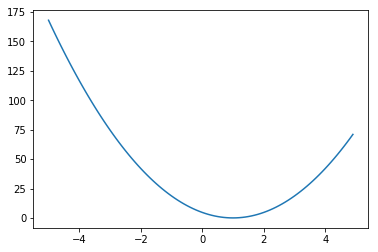

In [28]:
import matplotlib.pyplot as plt
xtrain = [1,2,3] # x ( 실제 입력 데이터값 )
ytrain = [1,2,3] # hf ( 실제 결과값 ) // 출력 결과값

w = tf.placeholder(tf.float32)
hf = xtrain*w
cost = tf.reduce_mean(tf.square(hf-ytrain)) # 차원이 줄여진다 

sess=tf.Session() # 세션생성 
sess.run(tf.global_variables_initializer()) # 임의의 난수 생성 # 변수 초기화 
wvList = []
cvList = []

for step in range(-50,50):
    fw=step*0.1
    cv, wv = sess.run([cost, w], feed_dict={w:fw})
    wvList.append(wv)
    cvList.append(cv)
plt.plot(wvList, cvList)
plt.show()

if step % 20==0:
    print(step, sess.run(cost), sess.run(w))

In [100]:
x = tf.placeholder(tf.float32) # x ( 실제 입력 데이터값 )
y = tf.placeholder(tf.float32) # hf ( 실제 결과값 ) // 출력 결과값
b = tf.Variable([-.3], tf.float32)
w = tf.Variable([100.], tf.float32)

hf = x * w+ b
loss = tf.reduce_sum(tf.square(hf-y)) # 차원이 줄여진다  # reduce_mean과 같아 

train=tf.train.GradientDescentOptimizer(1e-10).minimize(loss)
xtrain=[1,2,3,4]
ytrain=[0,-1,-2,-3]

sess=tf.Session() # 세션생성 
sess.run(tf.global_variables_initializer()) # 임의의 난수 생성 # 변수 초기화 

for step in range(2001):
    sess.run(train, feed_dict={x:xtrain, y:ytrain})
    if step % 20 == 0 :
        wv,bv,lv = sess.run([w,b,loss], feed_dict= {x:xtrain, y:ytrain})
        print('w:%s b:%s loss:%s' % (wv, bv, lv))


w:[100.] b:[-0.30000022] loss:303410.75
w:[100.] b:[-0.3000044] loss:303410.75
w:[100.] b:[-0.30000857] loss:303410.75
w:[100.] b:[-0.30001274] loss:303410.75
w:[100.] b:[-0.3000169] loss:303410.75
w:[100.] b:[-0.30002108] loss:303410.75
w:[100.] b:[-0.30002525] loss:303410.75
w:[100.] b:[-0.30002943] loss:303410.72
w:[100.] b:[-0.3000336] loss:303410.7
w:[100.] b:[-0.30003777] loss:303410.7
w:[100.] b:[-0.30004194] loss:303410.66
w:[100.] b:[-0.30004612] loss:303410.66
w:[100.] b:[-0.3000503] loss:303410.66
w:[100.] b:[-0.30005446] loss:303410.66
w:[100.] b:[-0.30005863] loss:303410.66
w:[100.] b:[-0.3000628] loss:303410.66
w:[100.] b:[-0.30006698] loss:303410.62
w:[100.] b:[-0.30007115] loss:303410.6
w:[100.] b:[-0.30007532] loss:303410.6
w:[100.] b:[-0.3000795] loss:303410.6
w:[100.] b:[-0.30008367] loss:303410.6
w:[100.] b:[-0.30008784] loss:303410.6
w:[100.] b:[-0.300092] loss:303410.6
w:[100.] b:[-0.30009618] loss:303410.56
w:[100.] b:[-0.30010036] loss:303410.56
w:[100.] b:[-0.3

In [102]:
xtrain = [1,2,3]
ytrain = [2,4,7]
w = tf.Variable(5.0)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

hf = x*w
cost = tf.reduce_mean(tf.square(hf-y))

lr = 0.01
gradient = tf.reduce_mean((w*x-y)*x)
descent = w-lr*gradient
update = w.assign(descent)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    sess.run(update, feed_dict = {x:xtrain, y:ytrain})
    print(step, sess.run(cost, feed_dict={x:xtrain, y:ytrain}))

0 33.032196
1 30.031977
2 27.305252
3 24.827078
4 22.5748
5 20.52783
6 18.667458
7 16.976671
8 15.440003
9 14.043416
10 12.774129
11 11.620548
12 10.572125
13 9.619267
14 8.753268
15 7.966211
16 7.250899
17 6.600792
18 6.0099435
19 5.472954


<function matplotlib.pyplot.legend(*args, **kwargs)>

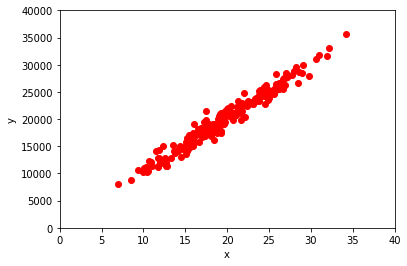

In [52]:
# 학습데이터 랜덤으로 만들고 이를 기반으로 회귀 시각화통해 데이터 분석 ㄱ
import numpy as np
num_points = 200
vectors_set = []
for i in range(num_points) :
    x = np.random.normal(5, 5) + 15
    y = x*1000 + np.random.normal(0.3)*1000 # 기울기 1000 
    vectors_set.append([x,y])
xdata = [v[0] for v in vectors_set]
ydata = [v[1] for v in vectors_set]
plt.plot(xdata,ydata,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,40])
plt.ylim([0,40000])
plt.legend # 범례 넣기 함수 
# vectors_set


In [106]:
w=tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b=tf.Variable(tf.zeros([1]))
y=w*xdata+b
loss=tf.reduce_mean(tf.square(y-ydata))
train=tf.train.GradientDescentOptimizer(1).minimize(loss)
sess.run(tf.initialize_all_variables())



W0729 17:34:00.614617 13664 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\util\tf_should_use.py:193: initialize_all_variables (from tensorflow.python.ops.variables) is deprecated and will be removed after 2017-03-02.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


0 [845833.1] [40140.477]
0 298508680000000.0


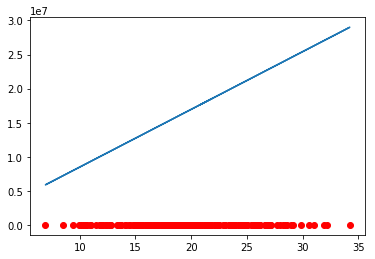

1 [-7.0425e+08] [-33350480.]
1 2.0743404e+20


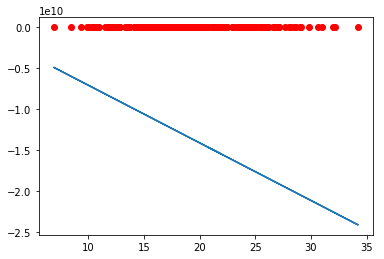

2 [5.8706874e+11] [2.7801375e+10]
2 1.44146105e+26


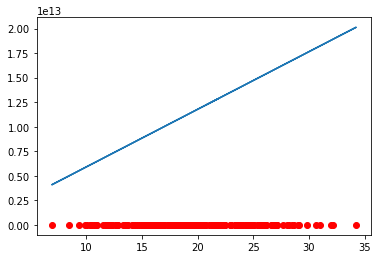

3 [-4.8938478e+14] [-2.3175428e+13]
3 1.0016731e+32


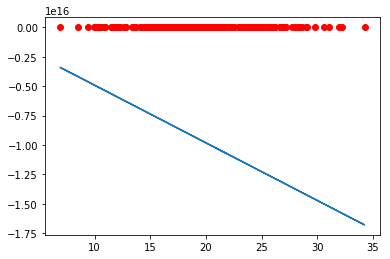

4 [4.0795472e+17] [1.9319205e+16]
4 inf


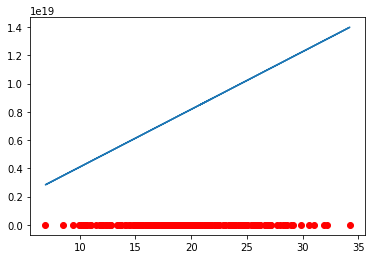

5 [-3.4007402e+20] [-1.6104629e+19]
5 inf


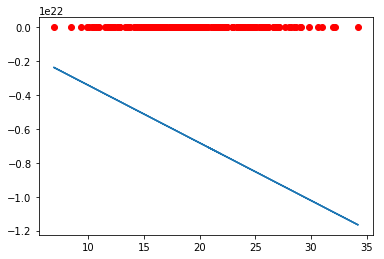

6 [2.834882e+23] [1.3424938e+22]
6 inf


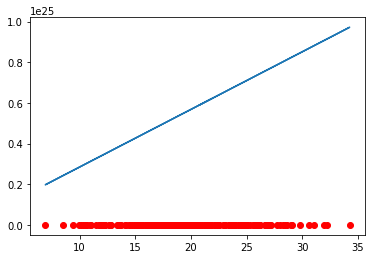

7 [-2.3631784e+26] [-1.1191125e+25]
7 inf


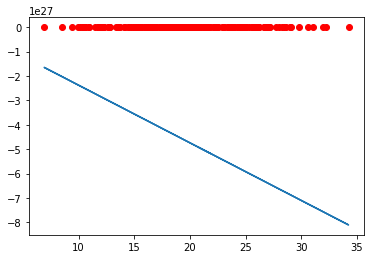

8 [1.969963e+29] [9.329004e+27]
8 inf


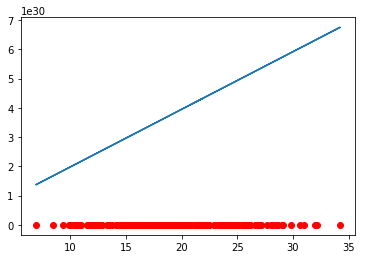

9 [-1.6421758e+32] [-7.776727e+30]
9 inf


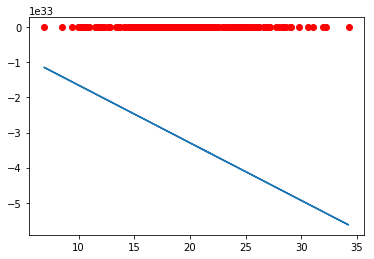

In [107]:
for step in range(10):
    sess.run(train)
    print(step, sess.run(w), sess.run(b))
    print(step, sess.run(loss))
    
    plt.plot(xdata, ydata, 'ro')
    plt.plot(xdata, sess.run(w)*xdata + sess.run(b))
    plt.show()


In [108]:
# keras 패키지 : 텐서플로우를 엔진으로 사용하는 파이썬 패키지
# 신경망을 쉽게 구현 
# 연습용 데이터셋 제공(CIFAR10, CIFAR100,영화, 뉴스, MNIST,보스턴)

from tensorflow import keras

mnist=keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()



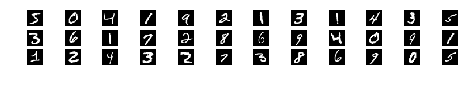

In [109]:
plt.figure(figsize=(8,1))
for i in  range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(xtrain[i], cmap='gray')
    plt.axis('off')
plt.show()

    

In [110]:
print(xtest.shape)
print(ytest.shape)

(10000, 28, 28)
(10000,)


In [111]:
xtrain=xtrain.reshape(60000, 28*28).astype('float32')/255.0
xtest=xtest.reshape(10000, 28*28).astype('float32')/255.0
print(xtrain.shape, xtrain.dtype)
print(xtest.shape, xtest.dtype)
print(ytrain[:10])


(60000, 784) float32
(10000, 784) float32
[5 0 4 1 9 2 1 3 1 4]


In [112]:
from tensorflow.keras.utils import to_categorical
ytrain=to_categorical(ytrain,10)
ytest=to_categorical(ytest,10)
ytrain[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [113]:
# # keras로 신경망 구성하는 순서 
'''
1) Sequential 클래스 => 객체 생성 
2) add 메서드 => 층( 레이어 )을 추가
- 입력부터 순서대로 추가 
- shape 체크
- activation 활성화 설정 
# 2개 변수 = > 4개 입력, 10개 출력 => 10개입 ,10개출
3) compile 메서드 -> 모델 생성
- loss, optimizer(알고리즘), 성능 기준 설정 
4) fit 메서드 -> 트레이닝
- 에폭설정 ( 6만개 data가 있다면 1에폭 - 6만개 data training 1회반복 )
- 배치 설정 (분할 -> 모델링 // tensorflow - Qlearner 메카니즘 사용)
'''


'\n1) Sequential 클래스 => 객체 생성 \n2) add 메서드 => 층( 레이어 )을 추가\n- 입력부터 순서대로 추가 \n- shape 체크\n- activation 활성화 설정 \n# 2개 변수 = > 4개 입력, 10개 출력 => 10개입 ,10개출\n3) compile 메서드 -> 모델 생성\n- loss, optimizer(알고리즘), 성능 기준 설정 \n4) fit 메서드 -> 트레이닝\n- 에폭설정 ( 6만개 data가 있다면 1에폭 - 6만개 data training 1회반복 )\n- 배치 설정 (분할 -> 모델링 // tensorflow - Qlearner 메카니즘 사용)\n'

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0)
model=Sequential()
model.add(Dense(15, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1), 
              loss='mean_squared_error', 
              metrics=['accuracy'])


In [117]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [4]:
QUEUE_LENGTH=20
q=tf.FUFOQueue(QUEUE_LENGTH, 'float')

NameError: name 'tf' is not defined